In [1]:
import pandas as pd

data = pd.read_csv("survey lung cancer.csv")

In [2]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data['SMOKING']=le.fit_transform(data['SMOKING'])
data['YELLOW_FINGERS']=le.fit_transform(data['YELLOW_FINGERS'])
data['ANXIETY']=le.fit_transform(data['ANXIETY'])
data['PEER_PRESSURE']=le.fit_transform(data['PEER_PRESSURE'])
data['CHRONIC DISEASE']=le.fit_transform(data['CHRONIC DISEASE'])
data['FATIGUE ']=le.fit_transform(data['FATIGUE '])
data['ALLERGY ']=le.fit_transform(data['ALLERGY '])
data['WHEEZING']=le.fit_transform(data['WHEEZING'])
data['ALCOHOL CONSUMING']=le.fit_transform(data['ALCOHOL CONSUMING'])
data['COUGHING']=le.fit_transform(data['COUGHING'])
data['SHORTNESS OF BREATH']=le.fit_transform(data['SHORTNESS OF BREATH'])
data['SWALLOWING DIFFICULTY']=le.fit_transform(data['SWALLOWING DIFFICULTY'])
data['CHEST PAIN']=le.fit_transform(data['CHEST PAIN'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
#1-male 0-female   1-yes 0-no

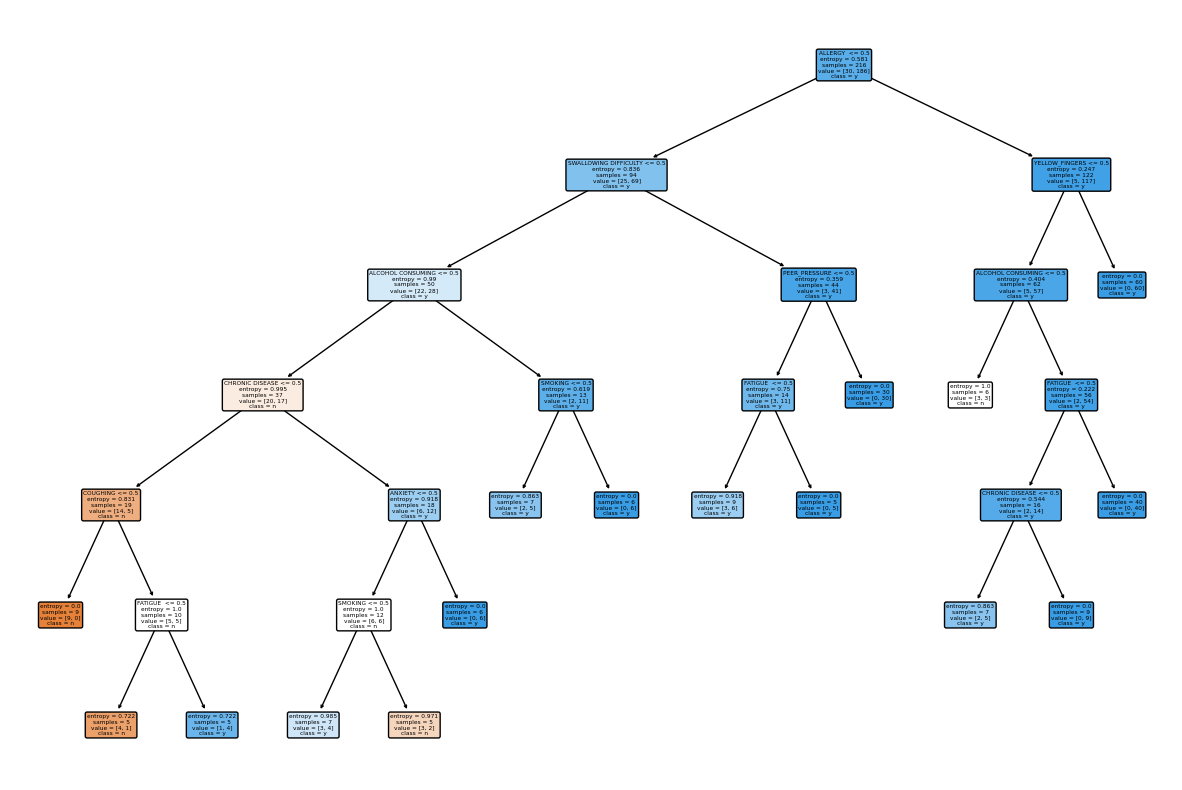

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0]
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
import numpy as np
import matplotlib.pyplot as plt

factors=pd.DataFrame(np.concatenate((np.array(data.values[:,0]).reshape(-1,1),np.array(data.values[:,2:15])),axis=1))
fact_columns=[i for i in list(data.columns)]
fact_columns.remove('AGE')
fact_columns.remove('LUNG_CANCER')
#print(fact_columns)
target=data.values[:,15]
train_x,test_x,train_y,test_y=train_test_split(factors,target,test_size=0.3,random_state=100)
dt=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=14,min_samples_leaf=5)
dt.fit(train_x,train_y)
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=fact_columns, class_names=['n','y'], rounded=True)
plt.show()
print(dt.predict(test_x))
test=[[1,0,0,1,1,0,1,0,0,0,0,0,0,0]]
print(dt.predict(test))
print(dt.decision_path(test))

In [4]:
tree_text = export_text(dt, feature_names=fact_columns)

# Print the textual representation
print(tree_text)

|--- ALLERGY  <= 0.50
|   |--- SWALLOWING DIFFICULTY <= 0.50
|   |   |--- ALCOHOL CONSUMING <= 0.50
|   |   |   |--- CHRONIC DISEASE <= 0.50
|   |   |   |   |--- COUGHING <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- COUGHING >  0.50
|   |   |   |   |   |--- FATIGUE  <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- FATIGUE  >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- CHRONIC DISEASE >  0.50
|   |   |   |   |--- ANXIETY <= 0.50
|   |   |   |   |   |--- SMOKING <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- SMOKING >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ANXIETY >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- ALCOHOL CONSUMING >  0.50
|   |   |   |--- SMOKING <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- SMOKING >  0.50
|   |   |   |   |--- class: 1
|   |--- SWALLOWING DIFFICULTY >  0.50
|   |   |--- PEER_PRESSURE <= 0.50
|   |   |   |--- FATIGUE  <= 0.50
|   |   |